In [1]:
#Name: Dishen Patel
#CWID: 20035834
#Models: Logistic Regression, Naive Bayes

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report,
    ConfusionMatrixDisplay,
    roc_curve,
    auc,
    precision_recall_curve
)

In [4]:
df = pd.read_csv("heart_disease_health_indicators_BRFSS2015.csv")


In [5]:
print("Dataset Shape:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())


Dataset Shape: (253680, 22)

Data Types:
 HeartDiseaseorAttack    float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
Diabetes                float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object

Missing Values:
 HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity  

In [6]:
X = df.drop('HeartDiseaseorAttack', axis=1)
y = df['HeartDiseaseorAttack']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
log_preds = log_model.predict(X_test)
log_probs = log_model.predict_proba(X_test)[:, 1]

In [8]:
print("Logistic Regression - Classification Report")
print(classification_report(y_test, log_preds))


Logistic Regression - Classification Report
              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95     45968
         1.0       0.55      0.13      0.21      4768

    accuracy                           0.91     50736
   macro avg       0.73      0.56      0.58     50736
weighted avg       0.88      0.91      0.88     50736



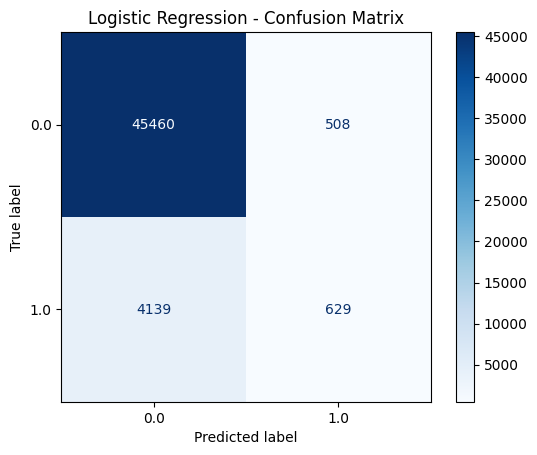

In [9]:
ConfusionMatrixDisplay.from_estimator(log_model, X_test, y_test, cmap='Blues')
plt.title("Logistic Regression - Confusion Matrix")
plt.show()


In [10]:
fpr, tpr, _ = roc_curve(y_test, log_probs)
roc_auc = auc(fpr, tpr)

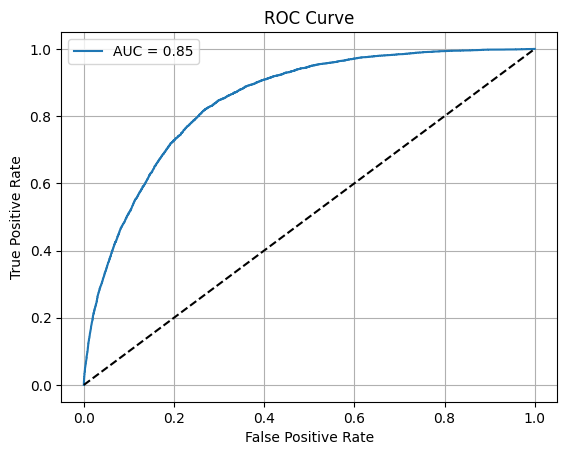

In [11]:
plt.figure()
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()

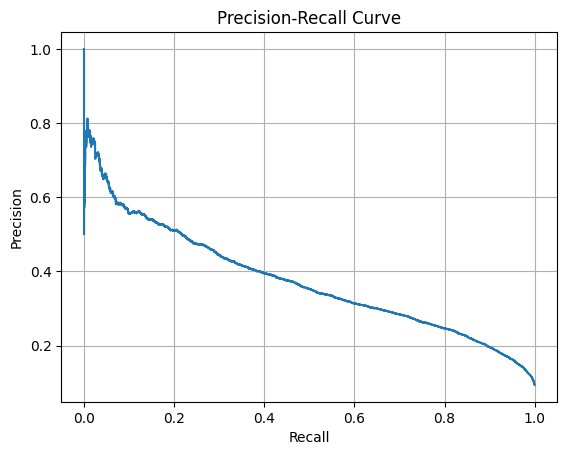

In [12]:
precision, recall, _ = precision_recall_curve(y_test, log_probs)

plt.figure()
plt.plot(recall, precision)
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid()
plt.show()

In [13]:
#Naive Bayes

In [14]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_preds = nb_model.predict(X_test)
nb_probs = nb_model.predict_proba(X_test)[:, 1]

In [15]:
print("Naive Bayes - Classification Report")
print(classification_report(y_test, nb_preds))

Naive Bayes - Classification Report
              precision    recall  f1-score   support

         0.0       0.95      0.85      0.89     45968
         1.0       0.27      0.55      0.36      4768

    accuracy                           0.82     50736
   macro avg       0.61      0.70      0.63     50736
weighted avg       0.88      0.82      0.84     50736



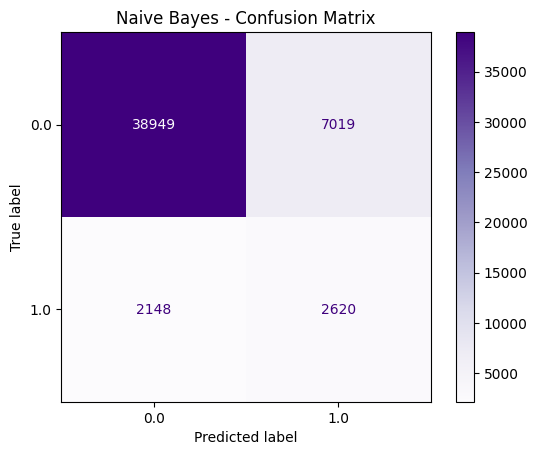

In [16]:
ConfusionMatrixDisplay.from_estimator(nb_model, X_test, y_test, cmap='Purples')
plt.title("Naive Bayes - Confusion Matrix")
plt.show()

In [17]:
fpr, tpr, _ = roc_curve(y_test, nb_probs)
roc_auc = auc(fpr, tpr)

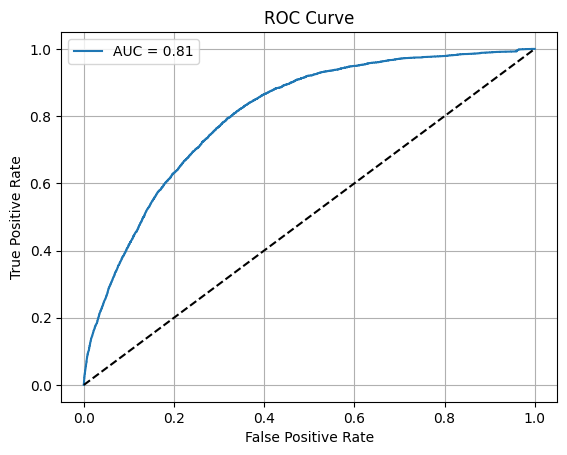

In [18]:
plt.figure()
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()

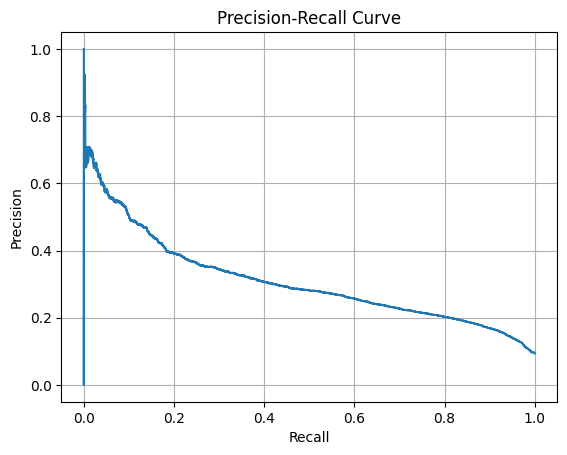

In [19]:
precision, recall, _ = precision_recall_curve(y_test, nb_probs)

plt.figure()
plt.plot(recall, precision)
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid()
plt.show()

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def model_scores(y_true, y_pred):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1-score": f1_score(y_true, y_pred)
    }

results = {
    "Logistic Regression": model_scores(y_test, log_preds),
    "Naive Bayes": model_scores(y_test, nb_preds)
}

pd.DataFrame(results).T


,Accuracy,Precision,Recall,F1-score
Logistic Regression,0.908408,0.553210,0.131921,0.213040
Naive Bayes,0.819320,0.271812,0.549497,0.363712


In [21]:
import joblib
joblib.dump(log_model, 'logistic_model.pkl')
joblib.dump(nb_model, 'naive_bayes_model.pkl')


['naive_bayes_model.pkl']

In [22]:
print("Number of features used to train the model:", X_train.shape[1])
print("Feature names:")
print(X_train.columns.tolist())


Number of features used to train the model: 21
Feature names:
['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']
